In [12]:
#import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#import data
df = pd.read_csv("myopia.csv")
df = df.drop("MYOPIC",axis=1)
#scale data
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [29]:
#perform PCA
pca_reducer = PCA(n_components=.9)
reduced_df = pca_reducer.fit_transform(df)
reduced_df.shape

(618, 10)

In [35]:
#perform t-SNE reduction
tsne_df = TSNE(n_components=2).fit_transform(reduced_df)
tsne_df

C:\Users\pauls\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\pauls\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ -2.2549982,   9.0693865],
       [ 16.918394 ,  18.79738  ],
       [ -1.8031561, -14.840744 ],
       ...,
       [ 19.569386 ,  19.098497 ],
       [ -9.737053 , -14.515795 ],
       [  8.250998 ,  27.644522 ]], dtype=float32)

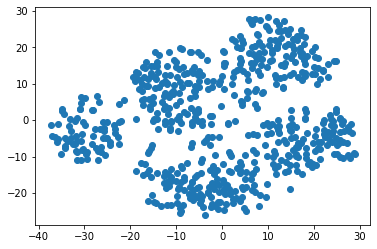

In [36]:
#plot the t-SNE output
plt.scatter(tsne_df[:,0],tsne_df[:,1])

Based on the scatter plot of the t-SNE output, I see about 5 clusters.

C:\Users\pauls\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


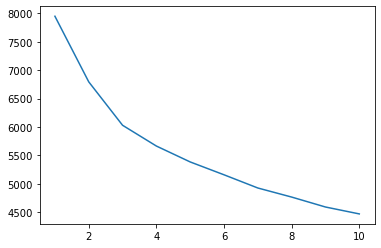

In [37]:
#The instructions were unclear as to whether I should do k-means clustering on
#the PCA reduced data or the t-SNE reduced data, so I did both.
#This cell clusters the 10 dimensional PCA reduced data.
k = []
inertias = []
for i in range(10):
    k.append(i+1)
    km = KMeans(n_clusters=i+1)
    km.fit(reduced_df)
    inertias.append(km.inertia_)
plt.plot(k,inertias)

C:\Users\pauls\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


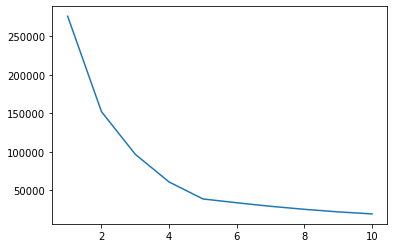

In [38]:
#The instructions were unclear as to whether I should do k-means clustering on
#the PCA reduced data or the t-SNE reduced data, so I did both.
#This cell clusters the 2 dimensional t-SNE reduced data.
#Note that the clustering and reduction are partially random, so the optimum
#number of clusters is also random.
k = []
inertias = []
for i in range(10):
    k.append(i+1)
    km = KMeans(n_clusters=i+1)
    km.fit(tsne_df)
    inertias.append(km.inertia_)
plt.plot(k,inertias)

# Analysis

The patients appear to be clusterable in about 3 clusters for the PCA-reduced data and 5 clusters after t-SNE.

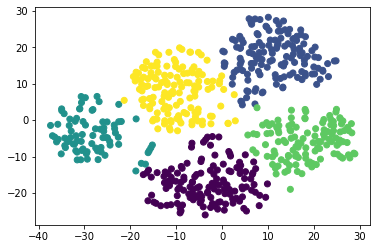

In [41]:
#plot of the clustered t-SNE data, colored by cluster
km = KMeans(n_clusters=5)
km.fit(tsne_df)

plt.scatter(tsne_df[:,0],tsne_df[:,1],c=km.labels_)